In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [13]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("pima-indians-diabetes-1.data",names = colnames)

In [14]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Checking Non real number of rows

In [24]:
df[~df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


# Filling with median

In [29]:
df = df.fillna(df.median())

In [30]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
target = 'class'

In [35]:
x= df.drop(target,axis =1)
y=df[target]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [41]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()
kn_model = KNeighborsClassifier()

In [42]:
models = []
models.append(('decisiontree',dt_model))
models.append(('randomforest',rf_model))
models.append(('logistic',lr_model))
models.append(('naivebayes',nb_model))
models.append(('knn',kn_model))

In [43]:
models

[('decisiontree', DecisionTreeClassifier()),
 ('randomforest', RandomForestClassifier()),
 ('logistic', LogisticRegression()),
 ('naivebayes', GaussianNB()),
 ('knn', KNeighborsClassifier())]

# Apply Scaling

In [45]:
x_std = StandardScaler().fit_transform(x)

In [49]:
from sklearn.model_selection import KFold,cross_val_score

# K fold - cross validation

In [58]:
results,names = [],[]
scoring = 'f1'
for name,model in models:
    kfold = KFold(n_splits=4,random_state=2,shuffle=True)
    cv_results = cross_val_score(model,x_std,y,cv =kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

decisiontree 0.593295 (0.059573)
randomforest 0.628288 (0.033804)
logistic 0.619434 (0.047428)
naivebayes 0.628214 (0.052060)
knn 0.573394 (0.034650)


C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


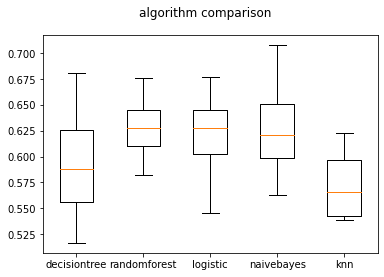

In [63]:
fig = plt.figure()
fig.suptitle("algorithm comparison")
plt.boxplot(results)
ax= fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()